In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings("ignore")
randomseed = 7

In [2]:
data1 = pd.read_csv("NextYearData_actualData_train.txt")
data2 = pd.read_csv("ThisYearData_actualData_train.txt")

data3 = pd.read_csv("ThisYearData_actualData_test.txt")
data4 = pd.read_csv("NextYearData_actualData_test.txt")

data5 = pd.read_csv("Predicted_NextYearData.txt")
data5.columns = data4.columns

# data = pd.concat([data1, data2, data3])
data=data1

print(data.shape)
data.head()

(33220, 16)


,Unnamed: 0,FIELD_1,FIELD_2,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,L100800,CLASS
0,0,1088387,20160715,6.73,148.0,29.4,38.0,5.6,3.0,0.0,1.0,0.0,0.0,53.0,115.0,1
1,1,137731,20161026,5.37,40.0,21.6,15.0,4.9,1.0,1.0,1.0,0.0,1.0,28.0,83.0,0
2,2,797147,20161123,5.76,176.0,25.9,91.0,4.7,3.0,1.0,0.0,0.0,0.0,43.0,111.0,1
3,3,1155086,20161129,6.13,124.0,29.2,20.0,5.5,1.0,0.0,0.0,1.0,1.0,57.0,98.0,0
4,4,887475,20140711,5.90,187.0,24.5,33.0,5.8,3.0,2.0,1.0,0.0,0.0,44.0,93.0,0


In [3]:
data1.tail()

,Unnamed: 0,FIELD_1,FIELD_2,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,L100800,CLASS
33215,33215,646655,20141103,5.20,109.0,23.2,21.0,6.6,3.0,1.0,0.0,0.0,0.0,37.0,97.0,0
33216,33216,789814,20140411,5.60,128.0,23.5,33.0,7.6,2.0,1.0,0.0,0.0,0.0,41.0,97.0,0
33217,33217,3077176,20170928,5.25,387.0,29.3,97.0,8.3,1.0,6.0,2.0,0.0,0.0,29.0,98.0,0
33218,33218,275079,20151113,5.29,60.0,26.4,23.0,5.2,1.0,4.0,1.0,0.0,0.0,30.0,95.0,0
33219,33219,882716,20140707,5.40,206.0,23.0,59.0,5.3,2.0,5.0,0.0,0.0,0.0,44.0,102.0,1


In [4]:
data2.tail()

,Unnamed: 0,FIELD_1,FIELD_2,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,L100800,CLASS
33215,33215,646655,20131018,5.20,62.0,22.3,17.0,7.4,3.0,1.0,3.0,0.0,0.0,36.0,95.0,0
33216,33216,789814,20130531,5.40,108.0,22.8,27.0,6.2,2.0,1.0,1.0,0.0,0.0,40.0,83.0,0
33217,33217,3077176,20160525,5.07,156.0,28.4,53.0,7.9,1.0,6.0,0.0,0.0,0.0,28.0,100.0,1
33218,33218,275079,20141104,5.00,60.0,25.2,20.0,5.8,1.0,2.0,0.0,0.0,0.0,29.0,90.0,0
33219,33219,882716,20130726,5.50,140.0,22.3,56.0,5.8,2.0,4.0,6.0,0.0,0.0,43.0,93.0,0


In [5]:
temptrain=pd.merge(data2,data1[["Unnamed: 0","FIELD_1","FIELD_2","L104600","L103000","S000300","L101700","L100700","FIELD_33",
                      "FIELD_38","FIELD_40","FIELD_31","SEX","AGE","L100800"]],
         left_on=["FIELD_1","Unnamed: 0"], right_on=["FIELD_1","Unnamed: 0"])
temptrain.shape

(33220, 29)

In [6]:
data1.shape

(33220, 16)

In [7]:
temptest=pd.merge(data3,data5[["Unnamed: 0","FIELD_1","FIELD_2","L104600","L103000","S000300","L101700","L100700","FIELD_33",
                      "FIELD_38","FIELD_40","FIELD_31","SEX","AGE","L100800"]],
         left_on=["FIELD_1","Unnamed: 0"], right_on=["FIELD_1","Unnamed: 0"])

In [8]:
temptrain.columns

Index(['Unnamed: 0', 'FIELD_1', 'FIELD_2_x', 'L104600_x', 'L103000_x',
       'S000300_x', 'L101700_x', 'L100700_x', 'FIELD_33_x', 'FIELD_38_x',
       'FIELD_40_x', 'FIELD_31_x', 'SEX_x', 'AGE_x', 'L100800_x', 'CLASS',
       'FIELD_2_y', 'L104600_y', 'L103000_y', 'S000300_y', 'L101700_y',
       'L100700_y', 'FIELD_33_y', 'FIELD_38_y', 'FIELD_40_y', 'FIELD_31_y',
       'SEX_y', 'AGE_y', 'L100800_y'],
      dtype='object')

In [51]:
diabetic = data[data.CLASS == 2]
prediabetic = data[data.CLASS == 1]
normal = data[data.CLASS == 0]

print(diabetic.shape[0], prediabetic.shape[0], normal.shape[0])

609 9866 22745


In [52]:
diabetic_test = diabetic.sample(200, random_state=randomseed)
prediabetic_test = prediabetic.sample(200, random_state=randomseed)
normal_test = normal.sample(200, random_state=randomseed)
test = pd.concat([diabetic_test, prediabetic_test, normal_test])

diabetic_train = diabetic.drop(diabetic_test.index)
prediabetic_train = prediabetic.drop(prediabetic_test.index).sample(
    2 * diabetic_train.shape[0], random_state=randomseed
)
normal_train = normal.drop(normal_test.index).sample(
    2 * diabetic_train.shape[0], random_state=randomseed
)
train = pd.concat([diabetic_train, diabetic_train, prediabetic_train, normal_train])

In [53]:
# xtrain = train.iloc[:, 3:-2]
# ytrain = train.iloc[:, -1]
# xtest = test.iloc[:, 3:-2]
# ytest = test.iloc[:, -1]

In [20]:
# xtrain = data2.iloc[:, 3:-1]
# ytrain = data1.iloc[:, -1]
# xtest = data3.iloc[:, 3:-1]
# ytest = data4.iloc[:, -1]

In [21]:
xtrain = temptrain.iloc[:, 3:]
ytrain = data1.iloc[:, -1]
xtest = temptest.iloc[:, 3:]
ytest = data4.iloc[:, -1]

In [22]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)


In [23]:
# x = data.iloc[:, 3:-2]
# y = data.iloc[:, -1]

# xtrain, xtest, ytrain, ytest = train_test_split(
#     x, y, random_state=randomseed, test_size=0.2
# )

# sm = SMOTE(random_state=randomseed)
# X_res, y_res = sm.fit_resample(xtrain, ytrain)

# print("Resampled dataset shape %s" % Counter(y_res))
# print(
#     y_res[y_res == 0].shape[0], y_res[y_res == 1].shape[0], y_res[y_res == 2].shape[0]
# )
# print(X_res.shape, y_res.shape)

# xtrain = X_res
# ytrain = y_res

# # y_res2 = y_res.copy()
# # from keras.utils import to_categorical
# # y_res2 = to_categorical(y_res)

# # xtrain, xtest, ytrain, ytest = train_test_split(
# #     X_res, y_res2, random_state=randomseed, test_size=0.2
# # )

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features="auto",
)
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=12, min_samples_leaf=10, random_state=7)

0.9978326309452137


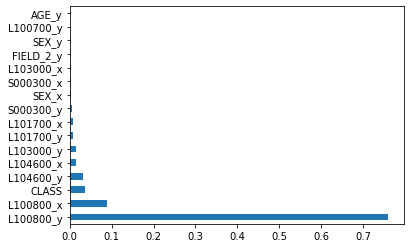

Index(['L100800_y', 'L100800_x', 'CLASS', 'L104600_y', 'L104600_x',
       'L103000_y', 'L101700_y', 'L101700_x', 'S000300_y', 'SEX_x',
       'S000300_x', 'L103000_x', 'FIELD_2_y', 'SEX_y', 'L100700_y', 'AGE_y'],
      dtype='object')


In [25]:
ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=temptrain.iloc[:, 3:].columns) 
#temptrain.iloc[:, 3:].columns # data3.iloc[:, 3:-1].columns
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [26]:
rf.predict_proba(xtest)[40:50,:]

array([[9.84627483e-01, 1.53725174e-02, 0.00000000e+00],
       [9.33574681e-01, 6.64253186e-02, 0.00000000e+00],
       [5.58128140e-02, 9.43346333e-01, 8.40853070e-04],
       [1.53049810e-02, 3.68678377e-01, 6.16016642e-01],
       [9.71285391e-01, 2.87146092e-02, 0.00000000e+00],
       [7.92781252e-02, 9.17743325e-01, 2.97854984e-03],
       [9.96018282e-03, 9.85241451e-01, 4.79836606e-03],
       [9.99438651e-01, 5.61348733e-04, 0.00000000e+00],
       [9.53603559e-01, 4.59964410e-02, 4.00000000e-04],
       [9.89679062e-01, 1.03209383e-02, 0.00000000e+00]])

In [27]:
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.999
Accuracy on test set: 0.998


,0,1,2
0,5741,0,0
1,0,2407,0
2,0,18,139


In [28]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5741
           1       0.99      1.00      1.00      2407
           2       1.00      0.89      0.94       157

    accuracy                           1.00      8305
   macro avg       1.00      0.96      0.98      8305
weighted avg       1.00      1.00      1.00      8305



In [20]:
import xgboost as xgb
from sklearn import metrics as m

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

xgb_model.fit(xtrain, ytrain)

y_pred = xgb_model.predict((xtest))

print("accuracy \t", m.accuracy_score(ytest, y_pred))
confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
confmatrx.head()

accuracy 	 0.7626730885009031


,0,1,2
0,5142,598,1
1,1257,1127,23
2,10,82,65


In [21]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      5741
           1       0.62      0.47      0.53      2407
           2       0.73      0.41      0.53       157

    accuracy                           0.76      8305
   macro avg       0.72      0.59      0.64      8305
weighted avg       0.75      0.76      0.75      8305



In [14]:
# =====================================

tempdata=data5

diabetic = tempdata[tempdata.CLASS == 2]
prediabetic = tempdata[tempdata.CLASS == 1].sample(diabetic.shape[0],random_state=0)
normal = tempdata[tempdata.CLASS == 0].sample(diabetic.shape[0],random_state=0)

tempdata5=pd.concat([diabetic,prediabetic,normal])
tempdata5.iloc[:, 3:-2]=scaler.transform(tempdata5.iloc[:, 3:-2])

pred5 = rf.predict((tempdata5.iloc[:, 3:-2]))
print(m.accuracy_score(tempdata5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(tempdata5.iloc[:, -1], pred5))
confmatrx

0.7070063694267515


,0,1,2
0,110,45,2
1,48,101,8
2,3,32,122


In [15]:
print(classification_report(tempdata5.iloc[:, -1], pred5))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       157
           1       0.57      0.64      0.60       157
           2       0.92      0.78      0.84       157

    accuracy                           0.71       471
   macro avg       0.72      0.71      0.71       471
weighted avg       0.72      0.71      0.71       471



In [ ]:
#xgboost test

In [16]:
tempdata5Rcolumns=tempdata5.iloc[:, 3:-2]
tempdata5Rcolumns.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
pred5 = xgb_model.predict((tempdata5Rcolumns))
print(m.accuracy_score(tempdata5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(tempdata5.iloc[:, -1], pred5))
confmatrx

0.6963906581740976


,0,1,2
0,109,46,2
1,52,97,8
2,2,33,122


In [17]:
print(classification_report(tempdata5.iloc[:, -1], pred5))


              precision    recall  f1-score   support

           0       0.67      0.69      0.68       157
           1       0.55      0.62      0.58       157
           2       0.92      0.78      0.84       157

    accuracy                           0.70       471
   macro avg       0.71      0.70      0.70       471
weighted avg       0.71      0.70      0.70       471



In [ ]:
# ========================================================

In [ ]:
import pickle

with open('_DiabeticClassifierModelForNextYear_rf_model', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
with open('_DiabeticClassifierModelForNextYear_scaler', 'wb') as f:
    pickle.dump(scaler, f)